In [2]:
from viper.utils import load_mutation_data_from_vcf, get_genome_length_from_fasta
from viper.hotspot import sliding_window_mutation_density, detect_hotspots
from viper.visualization import plot_mutation_density

# Load mutation data and genome length
mutation_df = load_mutation_data_from_vcf("data/sars_cov_mutations.vcf", min_qual=30)
genome_length = get_genome_length_from_fasta("data/sars_cov_reference.fasta")

print(mutation_df.head())

   position  count
0        43      1
1       240      1
2       328      1
3       533      1
4       669      1


In [3]:
# Compute mutation density with sliding windows
window_size = 300
step_size = 75

density_df = sliding_window_mutation_density(
    mutations_df=mutation_df,
    genome_length=genome_length,
    window_size=window_size,
    step_size=step_size
)

print(density_df.head())

   start  end  window_midpoint  mutation_count   density
0      0  300              150               2  0.006667
1     75  375              225               2  0.006667
2    150  450              300               2  0.006667
3    225  525              375               2  0.006667
4    300  600              450               2  0.006667


In [4]:
hotspots_df = detect_hotspots(
    density_df
)

print(hotspots_df.head())

   start    end  window_midpoint  mutation_count   density
0  22425  22725            22575             222  0.740000
1  22950  23250            23100             226  0.753333
2  23025  23325            23175             226  0.753333
3  23175  23475            23325             223  0.743333
4  23250  23550            23400             224  0.746667


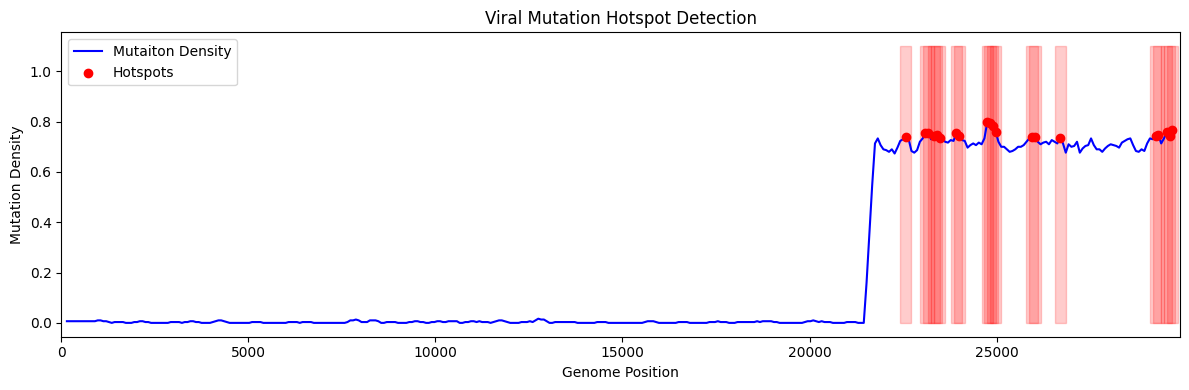

In [5]:
plot_mutation_density(
    density_df=density_df,
    hotspots_df=hotspots_df,
    genome_length=genome_length
)